In [223]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns
colors = sns.color_palette("tab10")

import glob
import os

In [224]:
Ls = 2 ** np.arange(4, 10, 1)
window = np.linspace(-0.005, 0.005, 11)
D = 5

pc_dict = {
    1: 0.16,
    2: 0.33,
    3: 0.418,
    4: 0.458,
    5: 0.478
}
pc = pc_dict[D]
ps = pc + window

pc_dict_new = {
    1: 0.15967,
    2: 0.32865,
    3: 0.416,
    4: 0.458,
    5: 0.4792
}
pc_new = pc_dict_new[D]

stub = "figs/{}_{}_".format(D, pc_new)

shots = np.repeat(128*128, Ls.shape[0])

In [225]:
def make_path(L, p, D):
    return "data/{}_{}_*_{}_{}_info.npy".format(L, L // 2, p, D)

In [226]:
# Load data. Rows are trip_mu, trip_std; columns are p
data_list = [np.zeros((2, ps.shape[0])) for _ in Ls]
for i, L in enumerate(Ls):
    data = data_list[i]
    for j, p in enumerate(ps):
        try:
            path = make_path(L, p, D)
            filename = sorted(glob.glob(path), key=os.path.getmtime)[-1]
            data[:, j] = np.load(filename).flatten()
        except:
            print("No data for L = {}, p = {}".format(L, p))
            taskid = int(j + 11 * (np.log2(L) - 4) + 66 * (D - 1) + 1)
            print("Task ID: {}".format(taskid))
            with open("logs/slurm-27825125_{}.out".format(taskid)) as f:
                print(f.read())
            print()
            continue

No data for L = 256, p = 0.473
Task ID: 309
Using 8 CPUs.
Sampling information for L = 256, D = 5, p = 0.473:
slurmstepd: error: *** JOB 28173625 ON sh03-07n59 CANCELLED AT 2023-08-21T14:55:46 DUE TO TIME LIMIT ***
slurmstepd: error: Detected 6 oom_kill events in StepId=28173625.batch. Some of the step tasks have been OOM Killed.


No data for L = 256, p = 0.474
Task ID: 310
Using 8 CPUs.
Sampling information for L = 256, D = 5, p = 0.474:
slurmstepd: error: *** JOB 28173626 ON sh03-13n18 CANCELLED AT 2023-08-21T14:55:46 DUE TO TIME LIMIT ***
slurmstepd: error: Detected 6 oom_kill events in StepId=28173626.batch. Some of the step tasks have been OOM Killed.


No data for L = 256, p = 0.475
Task ID: 311
Using 8 CPUs.
Sampling information for L = 256, D = 5, p = 0.475:
slurmstepd: error: *** JOB 28173627 ON sh03-13n18 CANCELLED AT 2023-08-21T14:55:46 DUE TO TIME LIMIT ***
slurmstepd: error: Detected 6 oom_kill events in StepId=28173627.batch. Some of the step tasks have been OOM Killed.


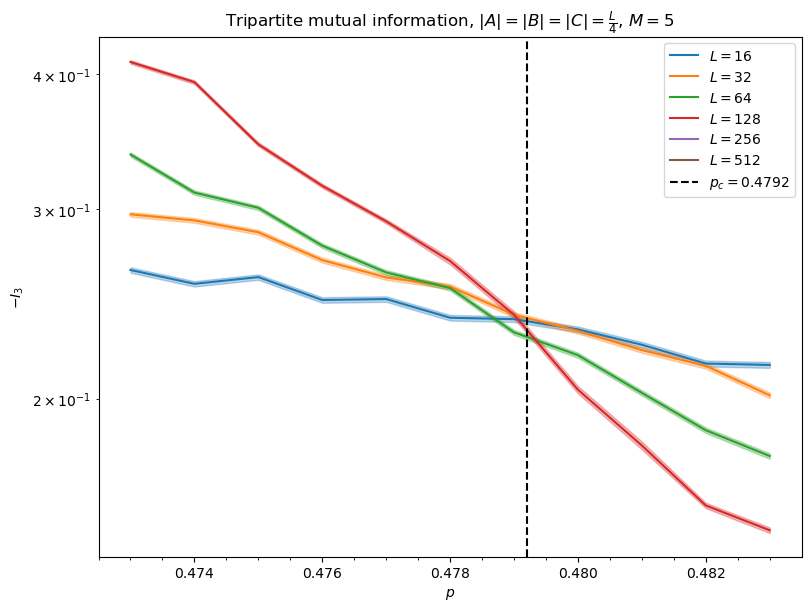

In [227]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    data = data_list[i]
    mu = data[0, :]
    std = data[1, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$-I_3$")
plt.title(r"Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$"+", $M={}$".format(D))
plt.minorticks_on()
plt.yscale("log")
# plt.xlim(0.1, 0.2)
# plt.ylim(0.01, 10)
plt.axvline(x = pc_new, color = "black", linestyle = "--", label = "$p_c = {:.4f}$".format(pc_new))
plt.legend(loc = "upper right")
plt.savefig(stub + "trip_log.png")

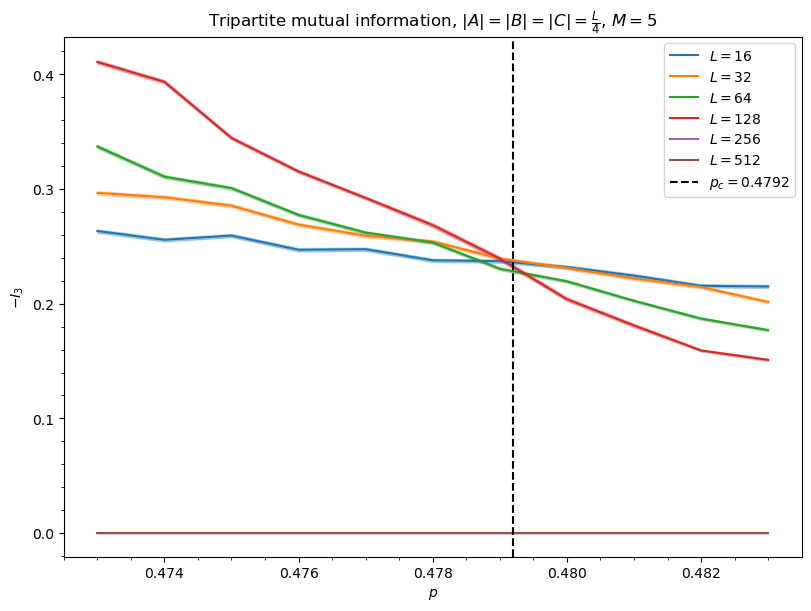

In [228]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    data = data_list[i]
    mu = data[0, :]
    std = data[1, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$-I_3$")
plt.title(r"Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$"+", $M={}$".format(D))
plt.minorticks_on()
# plt.yscale("log")
# plt.xlim(pc - 0.03, pc + 0.03)
# plt.ylim(0, 2)
plt.axvline(x = pc_new, color = "black", linestyle = "--", label = "$p_c = {:.4f}$".format(pc_new))
plt.legend(loc = "upper right")
plt.savefig(stub + "trip.png")

In [229]:
"""
nu = 1.2
fig, ax = plt.subplots(figsize=(8, 6), layout = "constrained")
lines = []

for i, L in enumerate(Ls):
    ps_scaled = (ps - pc_new) * L**(1 / nu)
    data = data_list[i]
    mu = data[0, :]
    # std = data[1, :]
    lines.append(ax.plot(ps_scaled, mu, label = "$L={}$".format(L), color = colors[i])[0])
ax.set(xlim = (-1, 1), ylim = (0, 2),
       xlabel = r"$(p-p_c)L^{1/\nu}$"+", $p_c={:.2f}$, $\\nu={:.2f}$".format(pc_new, nu),
       ylabel = r"$-I_3$",
       title = r"Scaled Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$")
ax.legend(loc = "upper right")
plt.close()

def update(frame):
    nu = 1.2 + frame * 0.001
    for i, L in enumerate(Ls):
        ps_scaled = (ps - pc_new) * L**(1 / nu)
        lines[i].set_xdata(ps_scaled)
    ax.set(xlabel = r"$(p-p_c)L^{1/\nu}$"+", $p_c={:.2f}$, $\\nu={:.3f}$".format(pc_new, nu))
    return lines

ani = animation.FuncAnimation(fig, update, frames = 200, interval = 20, blit = True)
HTML(ani.to_jshtml())
"""

'\nnu = 1.2\nfig, ax = plt.subplots(figsize=(8, 6), layout = "constrained")\nlines = []\n\nfor i, L in enumerate(Ls):\n    ps_scaled = (ps - pc_new) * L**(1 / nu)\n    data = data_list[i]\n    mu = data[0, :]\n    # std = data[1, :]\n    lines.append(ax.plot(ps_scaled, mu, label = "$L={}$".format(L), color = colors[i])[0])\nax.set(xlim = (-1, 1), ylim = (0, 2),\n       xlabel = r"$(p-p_c)L^{1/\nu}$"+", $p_c={:.2f}$, $\\nu={:.2f}$".format(pc_new, nu),\n       ylabel = r"$-I_3$",\n       title = r"Scaled Tripartite mutual information, $\\left|A\right|=\\left|B\right|=\\left|C\right|=\x0crac{L}{4}$")\nax.legend(loc = "upper right")\nplt.close()\n\ndef update(frame):\n    nu = 1.2 + frame * 0.001\n    for i, L in enumerate(Ls):\n        ps_scaled = (ps - pc_new) * L**(1 / nu)\n        lines[i].set_xdata(ps_scaled)\n    ax.set(xlabel = r"$(p-p_c)L^{1/\nu}$"+", $p_c={:.2f}$, $\\nu={:.3f}$".format(pc_new, nu))\n    return lines\n\nani = animation.FuncAnimation(fig, update, frames = 200, inter